In [130]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import text_processing
import utils
import tf_idf
import requests

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TypeError: Image data of dtype <U24 cannot be converted to float

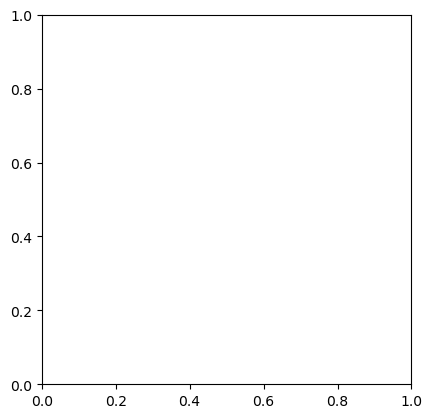

In [153]:
import matplotlib.image as mpimg
img = mpimg.imread("oscar_wilde_timeline.png")
plt.imshow(img)

# Wilde Ride - A Literary Analysis of Oscar Wilde's Corpus
##### Jessica Brown and Lauren Nalajala
## Background
Talk about Oscar Wilde's life here (add image for timeline of his life?)

And the goal of this project here

## Question
State research question
### Motivation

## Intial Text Processing
Talk about getting the data, processing it (ie. what we removed)

In [131]:
#Add timeline image here

And the goal of this project here

## Intial Text Processing
We gathered all of our data from Project Gutenberg by scraping. First, we made a list of the urls and title as strings of the Oscar Wilde works we wished to analyze (`ow_corpus_list`).

In [132]:
ow_corpus_list = [("https://www.gutenberg.org/files/773/773-0.txt", "Lord Arthur Savile's Crime and Other Short Stories"),
("https://www.gutenberg.org/cache/epub/902/pg902.txt", "The Happy Prince and Other Short Stories"),
("https://www.gutenberg.org/cache/epub/174/pg174.txt", "The Picture of Dorian Grey"),
("https://www.gutenberg.org/cache/epub/42704/pg42704.txt", "Salome"),
("https://www.gutenberg.org/files/873/873-0.txt", "A House of Pomegranates"),
("https://www.gutenberg.org/files/875/875-0.txt", "The Ducchess of Padua"),
("https://www.gutenberg.org/files/1017/1017-0.txt", "The Soul of Man Under Socialism"),
("https://www.gutenberg.org/files/790/790-0.txt", "Lady Windermeres Fan"),
("https://www.gutenberg.org/files/854/854-0.txt", "A Woman of No Importance"),
("https://www.gutenberg.org/files/844/844-0.txt", "The Importance of Being Earnest"),
("https://www.gutenberg.org/cache/epub/301/pg301.txt", "The Ballad of Reading Gaol"),
("https://www.gutenberg.org/files/885/885-0.txt", "An Ideal Husband")]


To retrieve and process this data, we wrote functions in the file `text_processing.py`. First, we ran `get_data_from_book` for "Lord Arthur Savile's Crime". This takes a url and title and returns a list of words that appear in the text. It also creates a .txt file with the same name as the title passed through it, and writes the same text to it. However, this text also has some encoding marks, so we run `remove_encoding_marks`. This removes the first word of the text (which is Project Gutenburg's extraneous text), any "\r\n" combinations, and empty strings.

In [133]:
lasc_raw = text_processing.get_data_from_book(ow_corpus_list[0][0], ow_corpus_list[0][1])
lasc_encode = text_processing.remove_encoding_marks(lasc_raw)
print(lasc_encode)

['project', 'gutenberg', 'ebook,', 'lord', 'arthur', "savile's", 'crime,', 'by', 'oscar', 'wilde', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'you', 'may', 'copy', 'it,', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www.gutenberg.org', 'lord', 'arthur', "savile's", 'crime', 'and', 'other', 'stories', 'author:', 'oscar', 'wilde', '\r\nrelease', 'date:', 'march', '14,', '2013', '[ebook', '#773]', '[this', 'file', 'was', 'first', 'posted', 'on', 'january', '5,', '1997]', 'language:', 'english', 'character', 'set', 'encoding:', 'utf-8', '***start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'lord', 'arthur', "savile's", 'crime***', 'transcribed', 'from', 'the', '1913', 'methuen', 'and', 'co.', 'edition', 'by', 'david', 'price,', 'email\r\nccx074@pg

As mentioned about, the text retrieved from Project Gutenberg's website includes introductions and closing statements that are not part of the original text, as well as a table of contents. In order to remove these, we use `remove_extra_text`, which removes this extraneous text as well as a given .csv file of common words (in this case, we use the top 200 most popular English language words). We do this by defining a "start word" and "end word", which are words we want the text to start and end at.

In [134]:
lasc_text_only = text_processing.remove_extra_text(lasc_encode, 'chapter', '\r\n\r\n***end')

We will also create a dictionary of start and end words for the other texts.

In [135]:
ow_start_end_words_dict = {"Lord Arthur Savile's Crime and Other Short Stories": ('chapter', '\r\n\r\n***end'),
                           "The Happy Prince and Other Short Stories": ('high', '\r\n\r\n***'),
                           "The Picture of Dorian Grey": ('chapter', '\r\n\r\n***'),
                           "Salome": ('\r\n\r\nproduced', 'lampe]'),
                           "A House of Pomegranates": ('sarawak]', '\r\n\r\n***end'),
                           "The Ducchess of Padua": ('noon_;', '\r\n\r\n***end'),
                           "The Soul of Man Under Socialism": ('\r\n\r\nthe', '\r\n\r\n***end'),
                           "Lady Windermeres Fan": ('fifteenth', '\r\n\r\n***'),
                           "A Woman of No Importance": ('***', '\r\n\r\n***'),
                           "The Importance of Being Earnest": ('***', '\r\n\r\n***'),
                           "The Ballad of Reading Gaol": ('***', '301.txt'),
                           "An Ideal Husband": ('methuen', '\r\n\r\n***')}

Finally, we will remove extraneous punctuation marks and titles with `remove_punctuation` and `remove_titles`, respectively. We will also use `remove_character_names` to remove the names of the main characters, which takes a tuple consisting of character names.

In [136]:
lasc_characters = ('windermere', 'arthur', 'savile', 'podgers', 'clementina', 'sybil', 'otis', 'canterville', 'washington', 'virginia', 'umney', 'simon', 'eleanor', 'murchinson', 'alan', 'trevor', 'alroy', 'hughie', 'erskine', 'laura', 'merton')
lasc = text_processing.remove_character_names(text_processing.remove_titles(text_processing.remove_punctuation(lasc_text_only)), lasc_characters)

This leaves us with an edited list of words in a given text (in this case, Lord Arthur Sevile's Crime). With this data, we can analyze Wilde's word usage in this text. However, in order to analyze multiple texts, we must import multiple texts. To do this, we will first create `character_dict`, which maps texts to a tuple of characters in that text. Then, we will use `initial_text_processing` on each text, which will perform all the operations we've done above (with the exception of removing common words after removing punctuation, which we found was necessary during our unit testing.)

In [137]:
character_dict = {"Lord Arthur Savile's Crime and Other Short Stories": ('windermere', 'arthur', 'savile', 'podgers', 'clementina', 'sybil', 'otis', 'canterville', 'washington', 'virginia', 'umney', 'simon', 'eleanor', 'murchinson', 'alan', 'trevor', 'alroy', 'hughie', 'erskine', 'laura', 'merton', 'willie', 'cyril', 'hughes'),
                           "The Happy Prince and Other Short Stories": ("happy", 'prince', 'swallow', 'student', 'nightingale', 'giant', 'hans', 'miller', 'rocket'),
                           "The Picture of Dorian Grey": ('dorian', 'basil', 'wolton', 'james', 'gray', 'hallward', 'sibyl', 'vane', 'campbell', 'fermor', 'singleton', 'victoria', 'henry', 'harry', '"i', '"you'),
                           "Salome": ('herod', 'judea', 'tigellinus', 'salome', 'antipas', 'jokanaan', 'herodius'),
                           "A House of Pomegranates": ('young', 'dwarf', 'fisherman', 'soul', 'king', 'infanta', 'mermaid', 'star-child'),
                           "The Ducchess of Padua": ('simone', 'andrea', 'taddeo', 'moranzano', 'gesso', 'maffio', 'guido', 'bernardo', 'beatrice', 'jeppo', 'ascanio', 'ugo', 'lucia'),
                           "The Soul of Man Under Socialism": ("",),
                           "Lady Windermeres Fan": ('windermere', 'lorton', 'dumby', 'agatha', 'darlington', 'cecil', 'hopper', 'carlisle', 'augustus', 'graham', 'parker', 'plymdale'),
                           "A Woman of No Importance": ('illingworth', 'john', 'pontefrac', 'alfred', 'rufford', 'kelvil', 'garld', 'arbuthnot'),
                           "The Importance of Being Earnest": ('john', 'worthington', 'algernon', 'moncrieff', 'bracknell', 'gwendolen', 'fairfax', '', 'cecily', 'ernest', 'jack', '[enter', 'algernon', 'bunbury', 'augusta'),
                           "The Ballad of Reading Gaol": ("",),
                           "An Ideal Husband": ('caversham', 'viscount', 'goring', 'robert', 'chiltern', 'vicomte', 'montford', 'pipps', 'mason', 'james', 'cheveley', 'mabel', 'phipps', 'markby', 'gertrude', 'arthur', '', 'basildon', 'marchmont')}

lord_arthur_saviles_crimes = text_processing.initial_text_processing(0, ow_corpus_list, ow_start_end_words_dict, character_dict)
the_happy_prince = text_processing.initial_text_processing(1, ow_corpus_list, ow_start_end_words_dict, character_dict)
dorian_grey = text_processing.initial_text_processing(2, ow_corpus_list, ow_start_end_words_dict, character_dict)
salome = text_processing.initial_text_processing(3, ow_corpus_list, ow_start_end_words_dict, character_dict)
house_of_pomegranates = text_processing.initial_text_processing(4, ow_corpus_list, ow_start_end_words_dict, character_dict)
ducchess_of_padua = text_processing.initial_text_processing(5, ow_corpus_list, ow_start_end_words_dict, character_dict)
the_soul_under_socialism = text_processing.initial_text_processing(6, ow_corpus_list, ow_start_end_words_dict, character_dict)
lady_windermeres_fan = text_processing.initial_text_processing(7, ow_corpus_list, ow_start_end_words_dict, character_dict)
a_woman_of_no_importance = text_processing.initial_text_processing(8, ow_corpus_list, ow_start_end_words_dict, character_dict)
importance_of_being_earnest = text_processing.initial_text_processing(9, ow_corpus_list, ow_start_end_words_dict, character_dict)
reading_gaol = text_processing.initial_text_processing(10, ow_corpus_list, ow_start_end_words_dict, character_dict)
ideal_husband = text_processing.initial_text_processing(11, ow_corpus_list, ow_start_end_words_dict, character_dict)

## Word Usage
First, we decided to analyze the frequency of different words across several books. In our initial attempts to do this, we plotted the most common words in the text, without any of the processing detailed above. Unfortunately, that resulted in this plot (using 'Lord Arthur Savile's Crime', 'The Importance of Being Earnest', and 'An Ideal Husband" as examples).

/home/lnalajala/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lnalajala/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


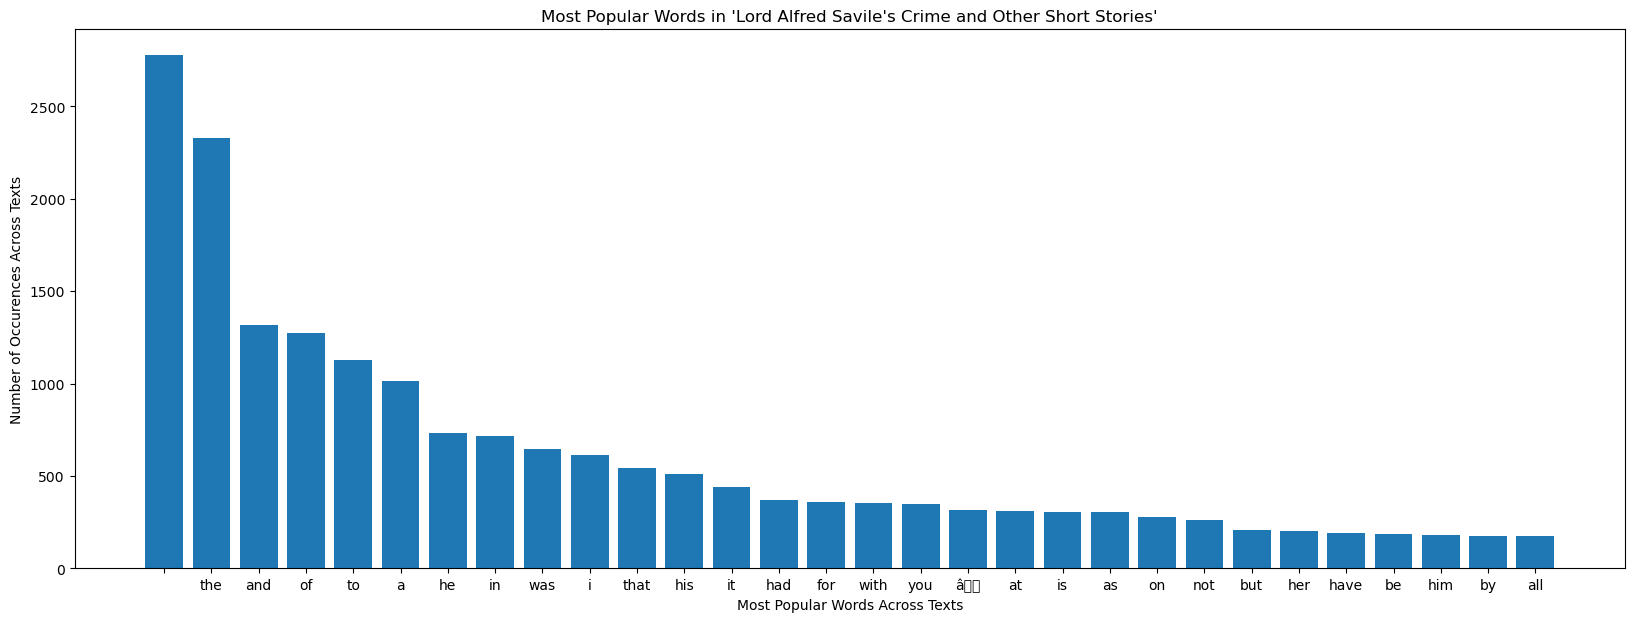

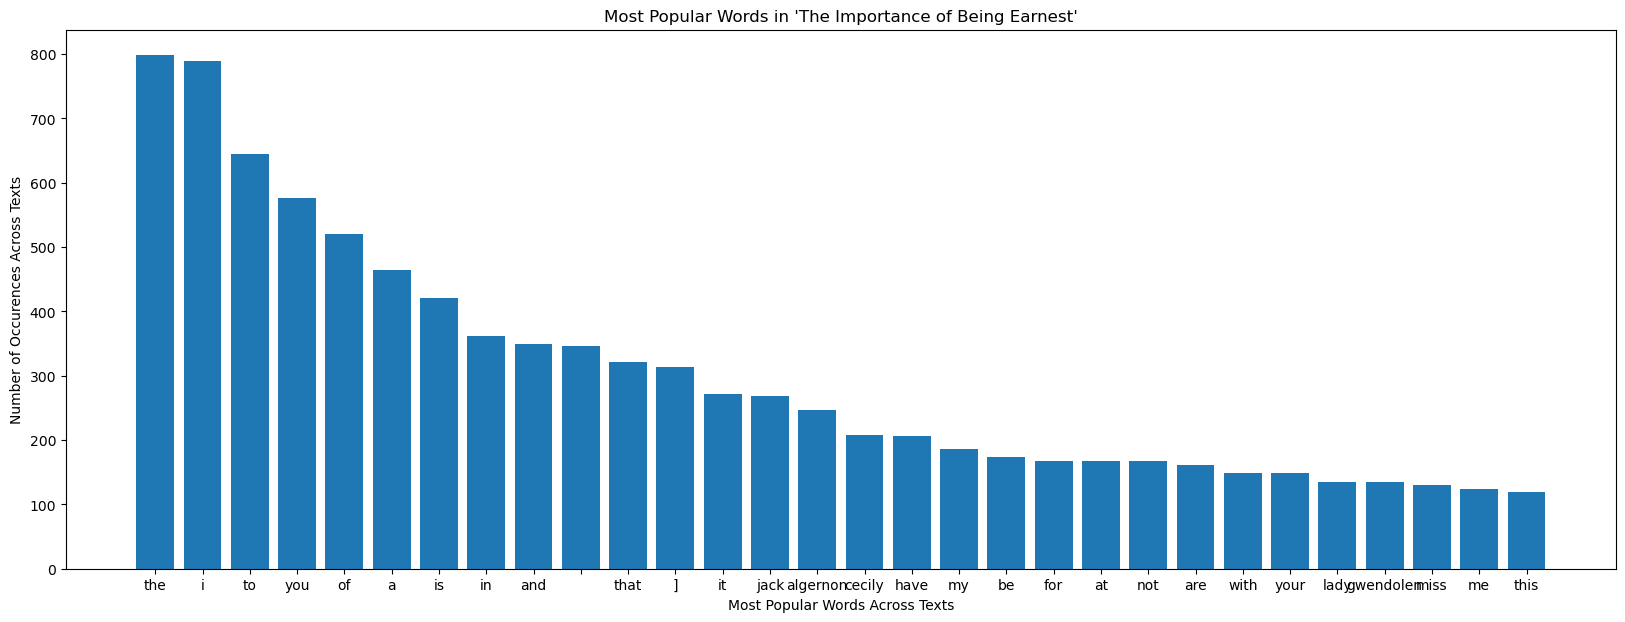

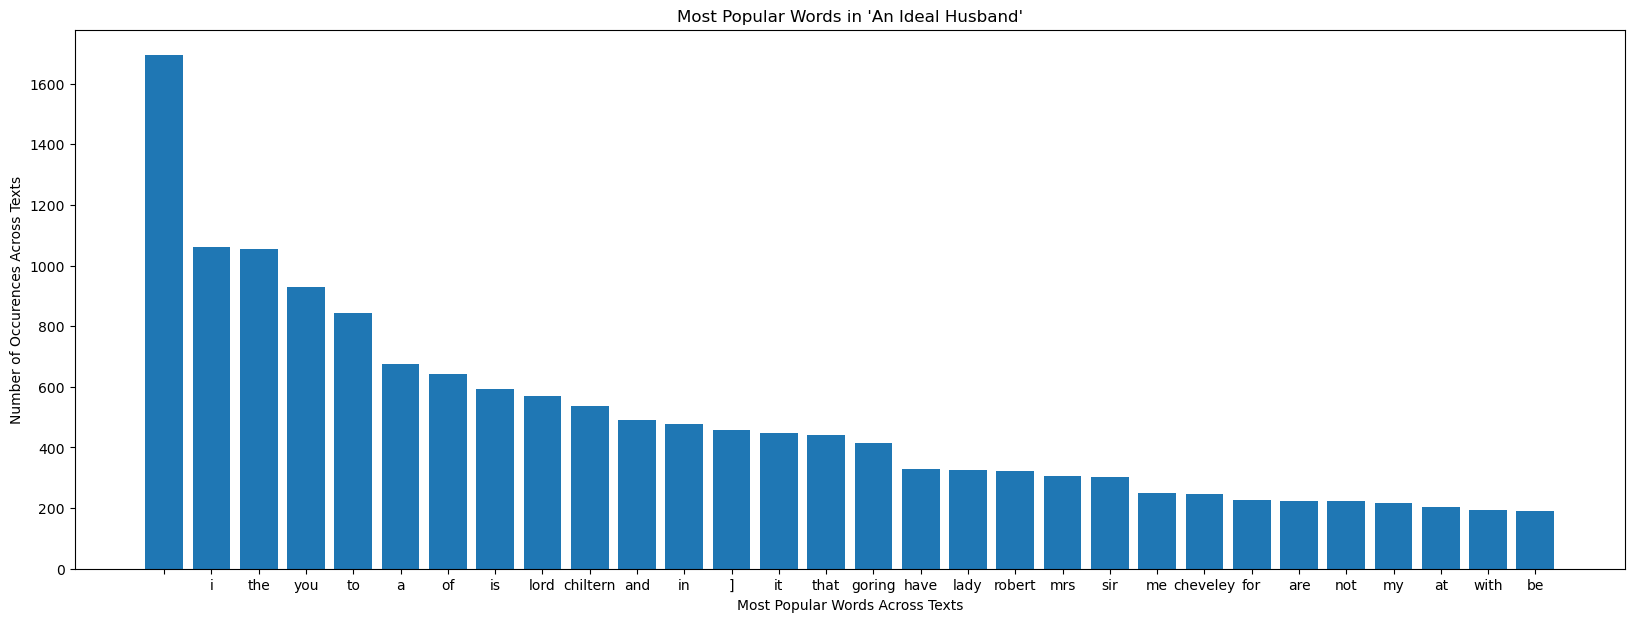

In [138]:
from utils import plot_most_freq_words_texts
from plotting import plot_freq_bar_one_book

lasc_freqs = plot_most_freq_words_texts([ow_corpus_list[0]], 30)
plot_freq_bar_one_book(lasc_freqs, "Most Popular Words in \'Lord Alfred Savile\'s Crime and Other Short Stories\'")
earnest_freqs = plot_most_freq_words_texts([ow_corpus_list[9]], 30)
plot_freq_bar_one_book(earnest_freqs, "Most Popular Words in \'The Importance of Being Earnest\'")
husband_freqs = plot_most_freq_words_texts([ow_corpus_list[11]], 30)
plot_freq_bar_one_book(husband_freqs, "Most Popular Words in \'An Ideal Husband\'")

As you can see, these lists are dominated by common words like "the" and "and". Two are also led by the empty string. There are also extraneous characters that are obviously part of the formatting and not the words in the text itself. Some titles are visible, and the names of certain characters are show up. As a result, we decided to perform the processing operations described above.

Although this data does not provide much use for analyzing the mood of Wilde's writing at the time, it is interesting to note that "he/him/his" pronouns generally appear more frequently than "she/her/hers" pronouns.

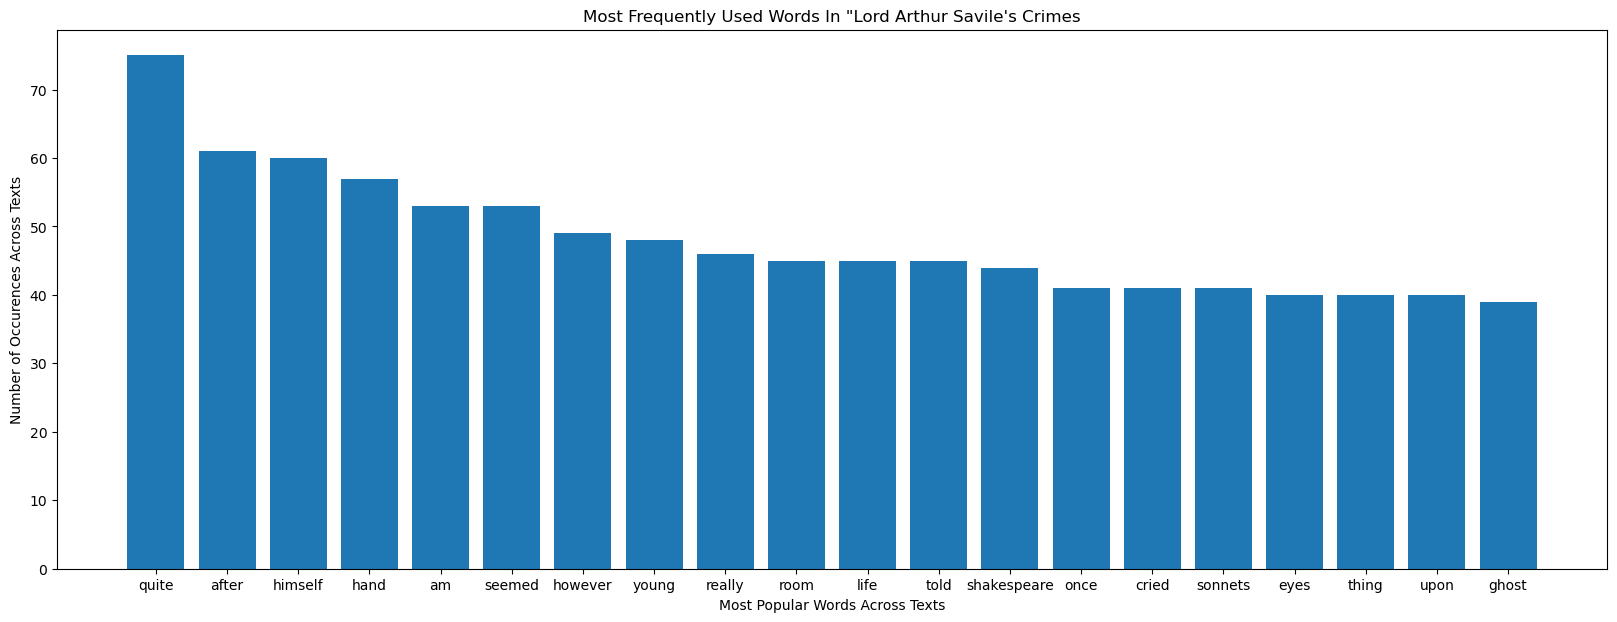

In [139]:
from plotting import plot_freq_bar
freq_lasc = tf_idf.calc_word_freq(lord_arthur_saviles_crimes, 20)
plot_freq_bar(freq_lasc, 'Most Frequently Used Words In "Lord Arthur Savile\'s Crimes')

Now that we've removed all the extraneous words, there is much more variation in the most frequent words used. In "Lord Arthur Savile's Crime", we can see certain trends emerging. Wilde frequently used the words "young" and "life" in this work, suggesting a focus on youth. At the time of publishing, Wilde has just become a father to two young boys, who he adored. It seems that Wilde was inspired by the life in his children, and wanted to take hold of his own. He also uses the words "shakespeare" and "sonnets", which speak to some of his literary influences at the time.

We will now plot and analyze the most frequently used words in some of Wilde's other texts.

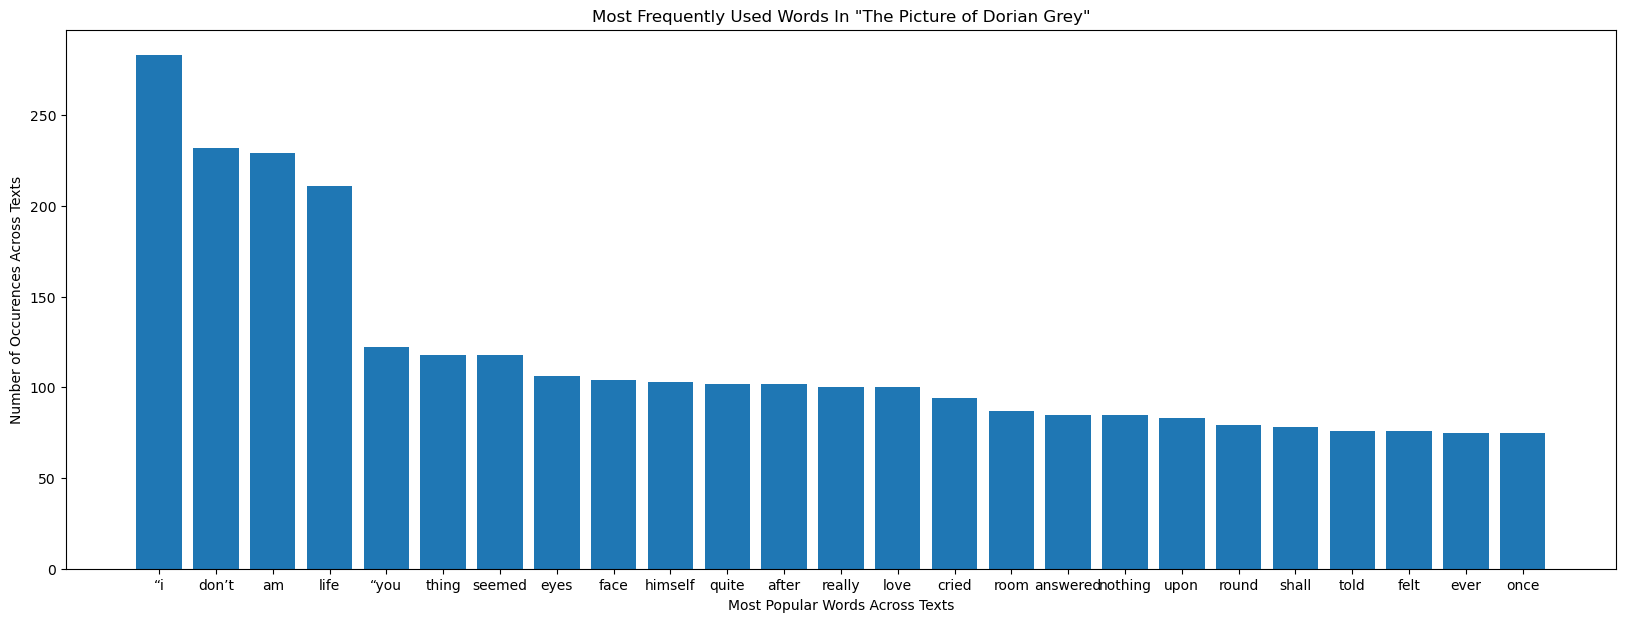

In [140]:
dg_freq = tf_idf.calc_word_freq(dorian_grey, 25)
plot_freq_bar(dg_freq, 'Most Frequently Used Words In "The Picture of Dorian Grey"')

In his most famous work, Wilde again uses words speaking to the human experience, such as "life" and "love". This suggests that he still had a focus on getting the most out of life, but now he is exploring that through love. (Shortly after this, he would begin his romance with Lord Alfred Douglas.) He also uses several words that relate to the eponymous portrait, such as "eyes", and "face". Rather than focusing on the more grotesque parts of the portrait, Wilde focuses on the eyes and face, which are often said to be the easiest way to glean emotion. This shows Wilde's strong connection to human emotion.

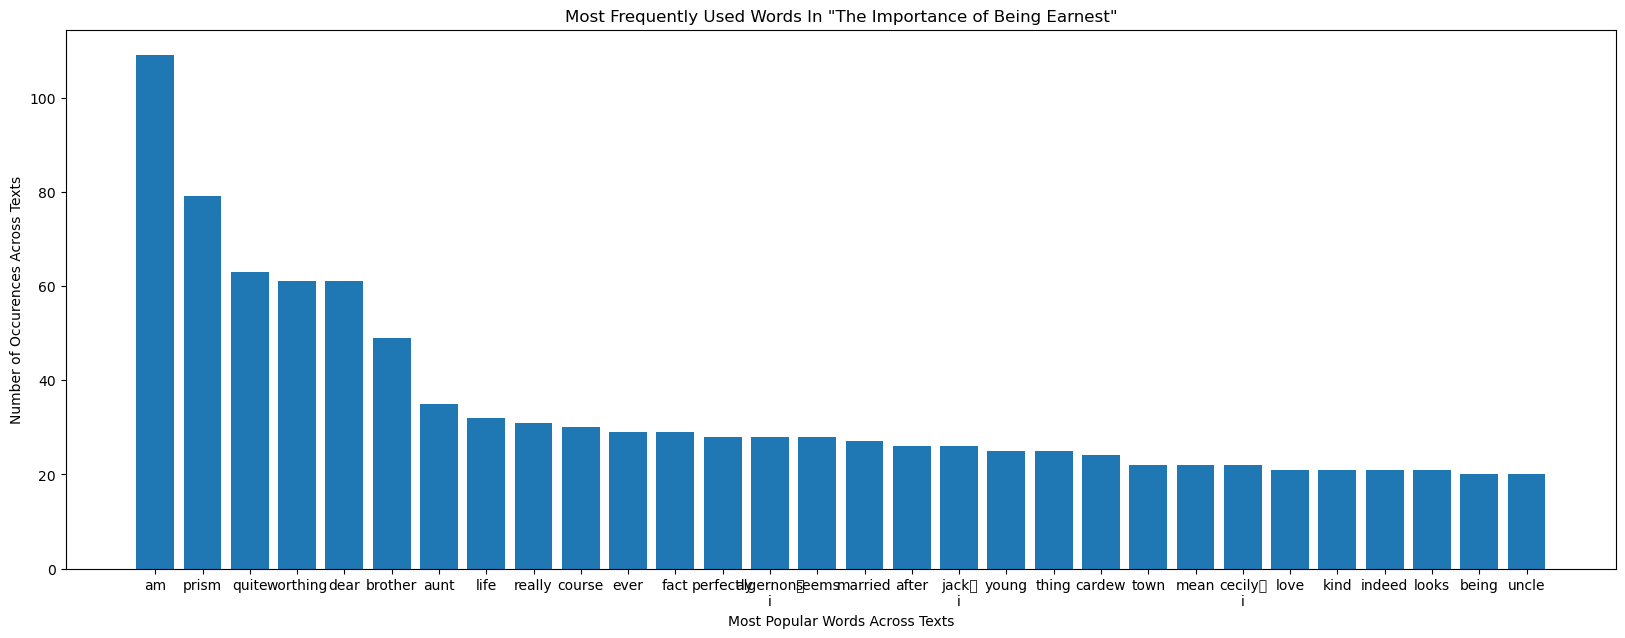

In [141]:
plot_freq_bar(tf_idf.calc_word_freq(importance_of_being_earnest, 30), 'Most Frequently Used Words In "The Importance of Being Earnest"')

In his most popular work at the time, Wilde again uses the words "life" and "love", along with "young" and "looks". This suggests that Wilde was thinking about vanity while writing this work, although it's difficult to tell if he was making a commentary on it or focusing in on it for himself. In this work, there is a also a strong theme of family and normalcy, as the words "brother", "aunt", "married", "town", and "uncle" appear frequently. During the writing of this, Wilde's romance with Lord Alfred was at its peak, suggesting that perhaps Wilde felt some guilt at his lack of conformity to societal norms.

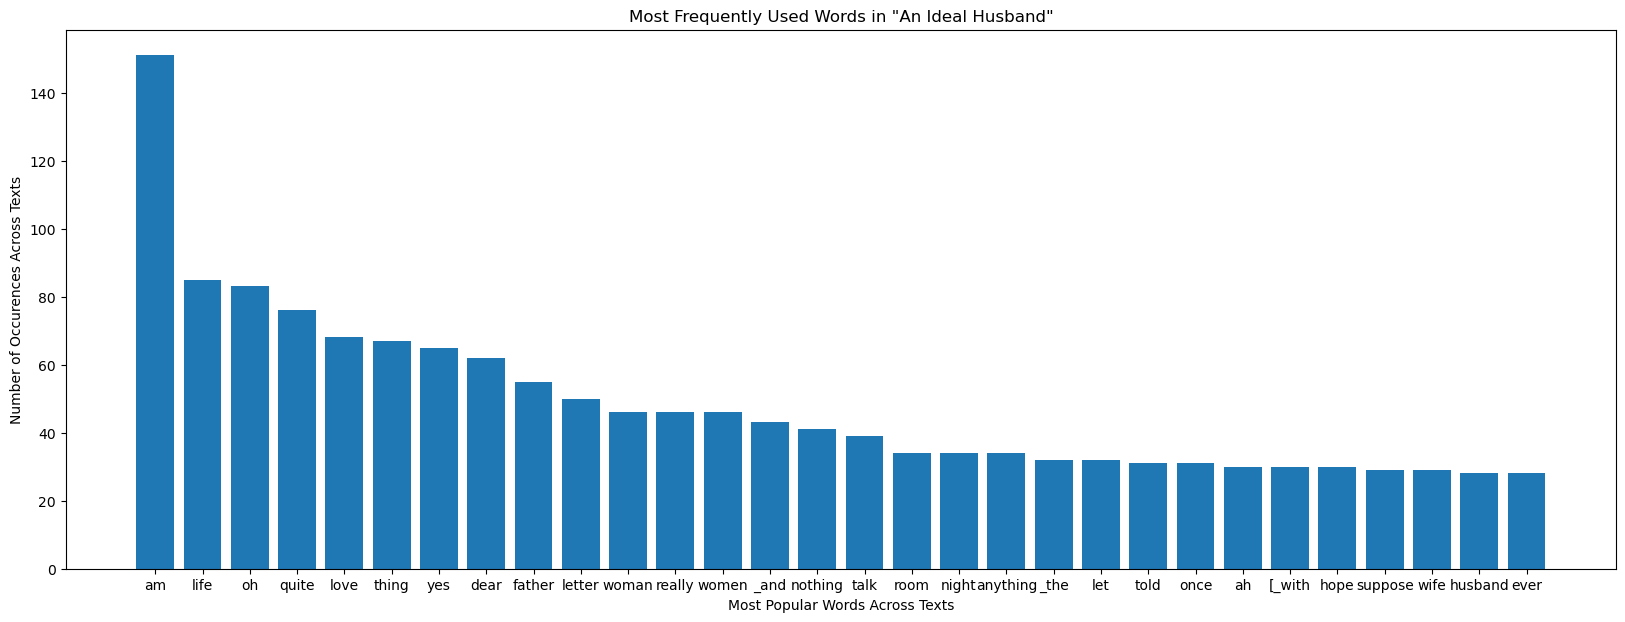

In [142]:
plot_freq_bar(tf_idf.calc_word_freq(ideal_husband, 30), 'Most Frequently Used Words in "An Ideal Husband"')

In his final work, Wilde again uses "love" and "life" frequently. The strong emphasis on family remains, shown by his use of the words "father", "wife", and "husband". Interestingly, both "woman" and "women" are used frequently. At this point in his life, Wilde had recently lost both his wife and his mother, two of the most important women in his life. Perhaps these loses caused him to think more about women. Despite his recent loses and time spent in jail, Wilde also uses the word "hope" very frequently in the text. Whether he is condemning the idea of hope or not is unclear.

## How Verbose was Oscar Wilde Over Time? Why Might his verbosity have changed? 
### Average Sentence Length Across All Books
Wilde's word choice was not the only metric we chose to analyse. We also determined the average length of his sentences in each of the texts, which we plotted below.

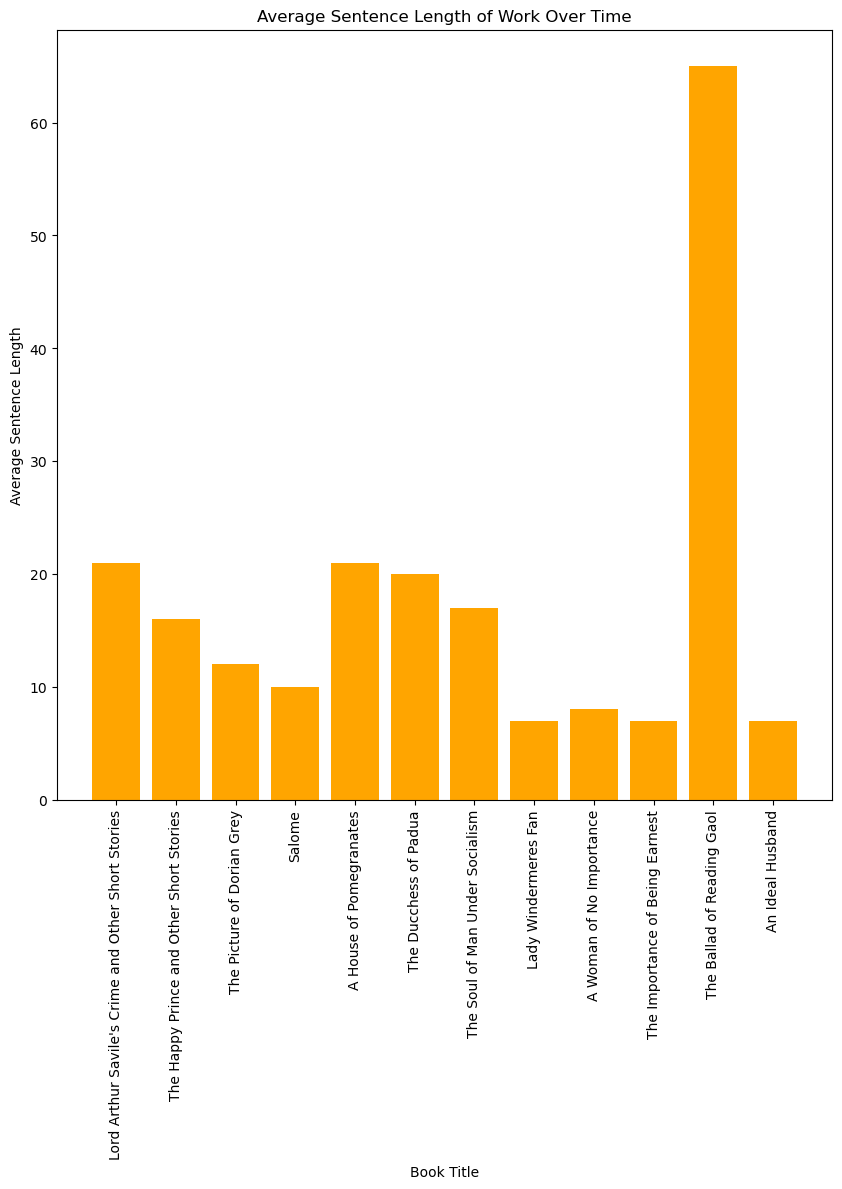

In [143]:
from utils import get_avg_sentence_length
from plotting import plot_avg_sentence_lengths_all_books
sentence_lengths = get_avg_sentence_length(ow_corpus_list)
plot_avg_sentence_lengths_all_books(sentence_lengths)

Just from looking at this plot, it is easy to see that "The Ballad of Reading Gaol" is an outlier. This is because it was the only poem out of the texts we analyzed, so the change in form may have influenced choice of sentence length. Otherwise, the average sentence length hovers between 5 and 25 words. Initially, Wilde's sentence length decreases until it reaches a low in "Salome", which was intially written in French before being translated to English. Then, it spikes back up with "A House of Pomegranates" before decreasing again. Interestingly, his most popular work at the time - "The Importance of Being Earnest" had the second-shortest sentences, only beat in terms of brevity by his last play, "An Ideal Husband".

We also saw before that there are clear stylistic similarities between "The Importance of Being Earnest" and "An Ideal Husband", even though Wilde went through several major life changes in the time between. However, "The Ballad of Reading Gaol", which was written between the two, shows a clear departure in style and form. From this information, I would posit that Wilde was attempting to imitate his earlier success while writing "An Ideal Husband." 

## What counts as an alliterative sequence?
We decided to define an alliterative sequence as two consecutive words in the same sentence that have the same starting phoneme, or sound. 
We decided not to do words with spacing in between them due to time constraints. Using this definition, we calculated the occurences of alliteration based on different phenomes, and made word clouds of the most frequently used alliterative words and some sample alliterative pairings. This information is plotted below for three different novels.

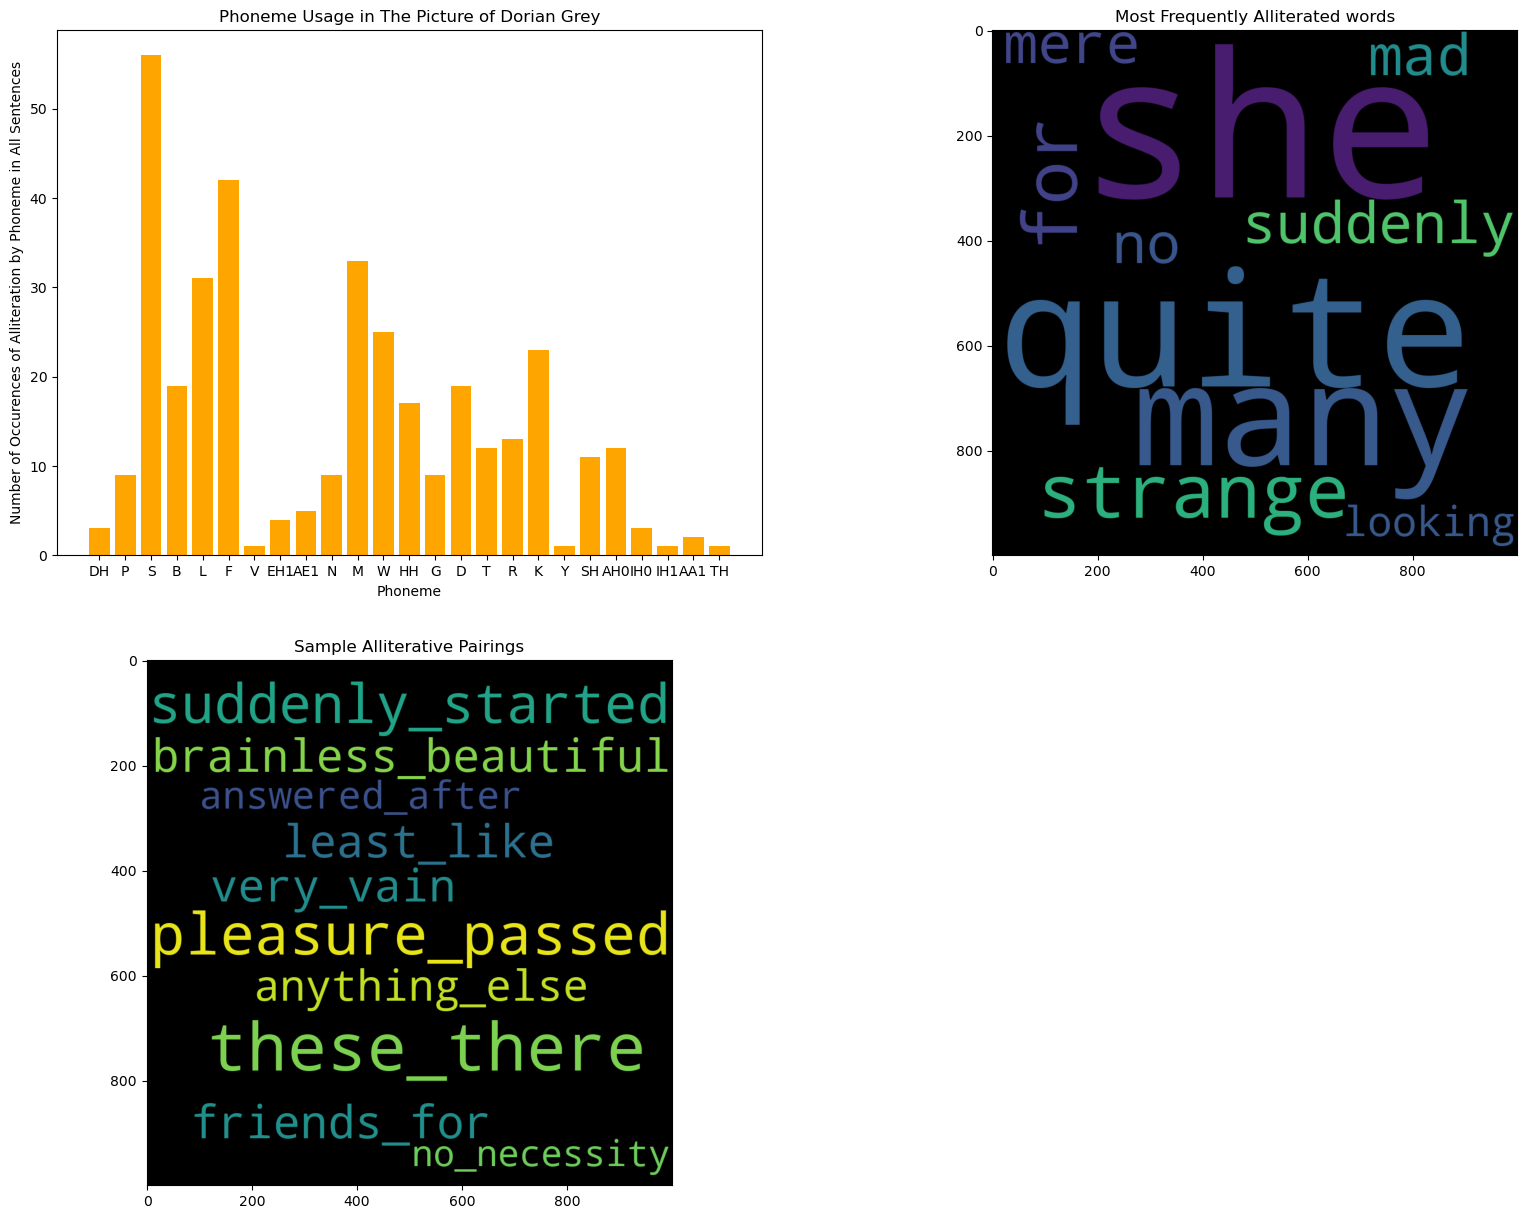

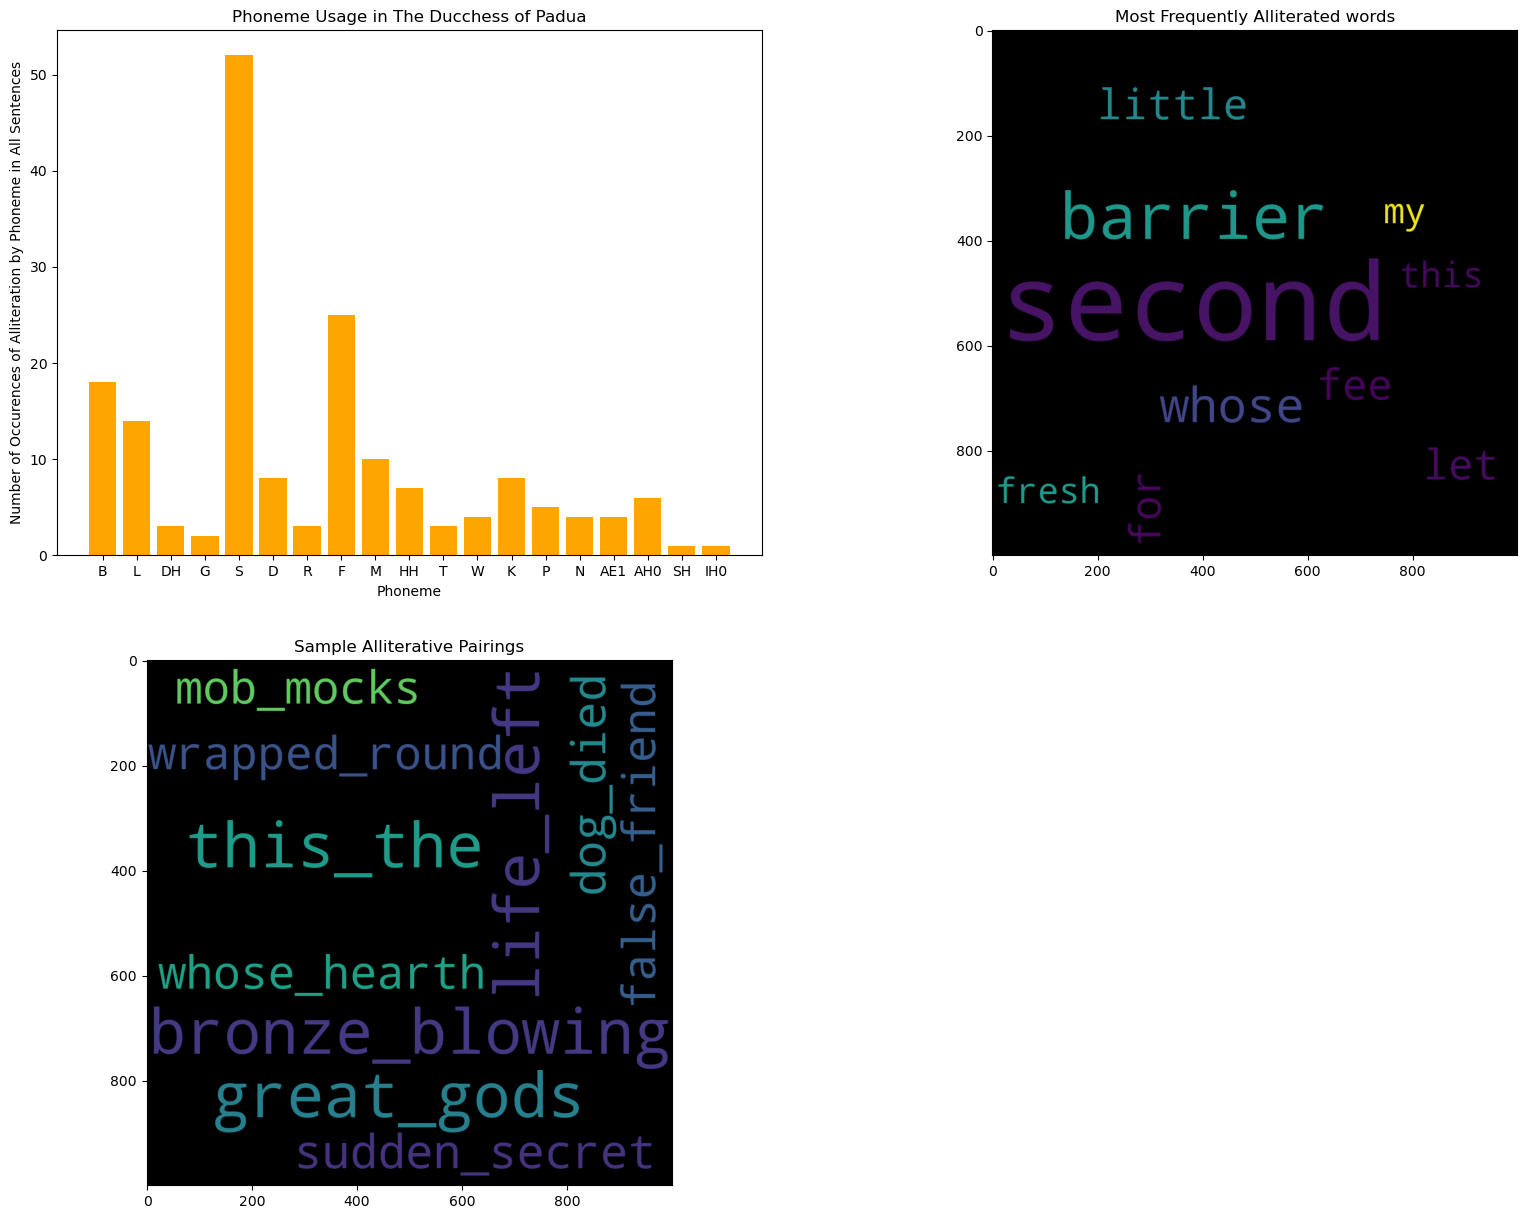

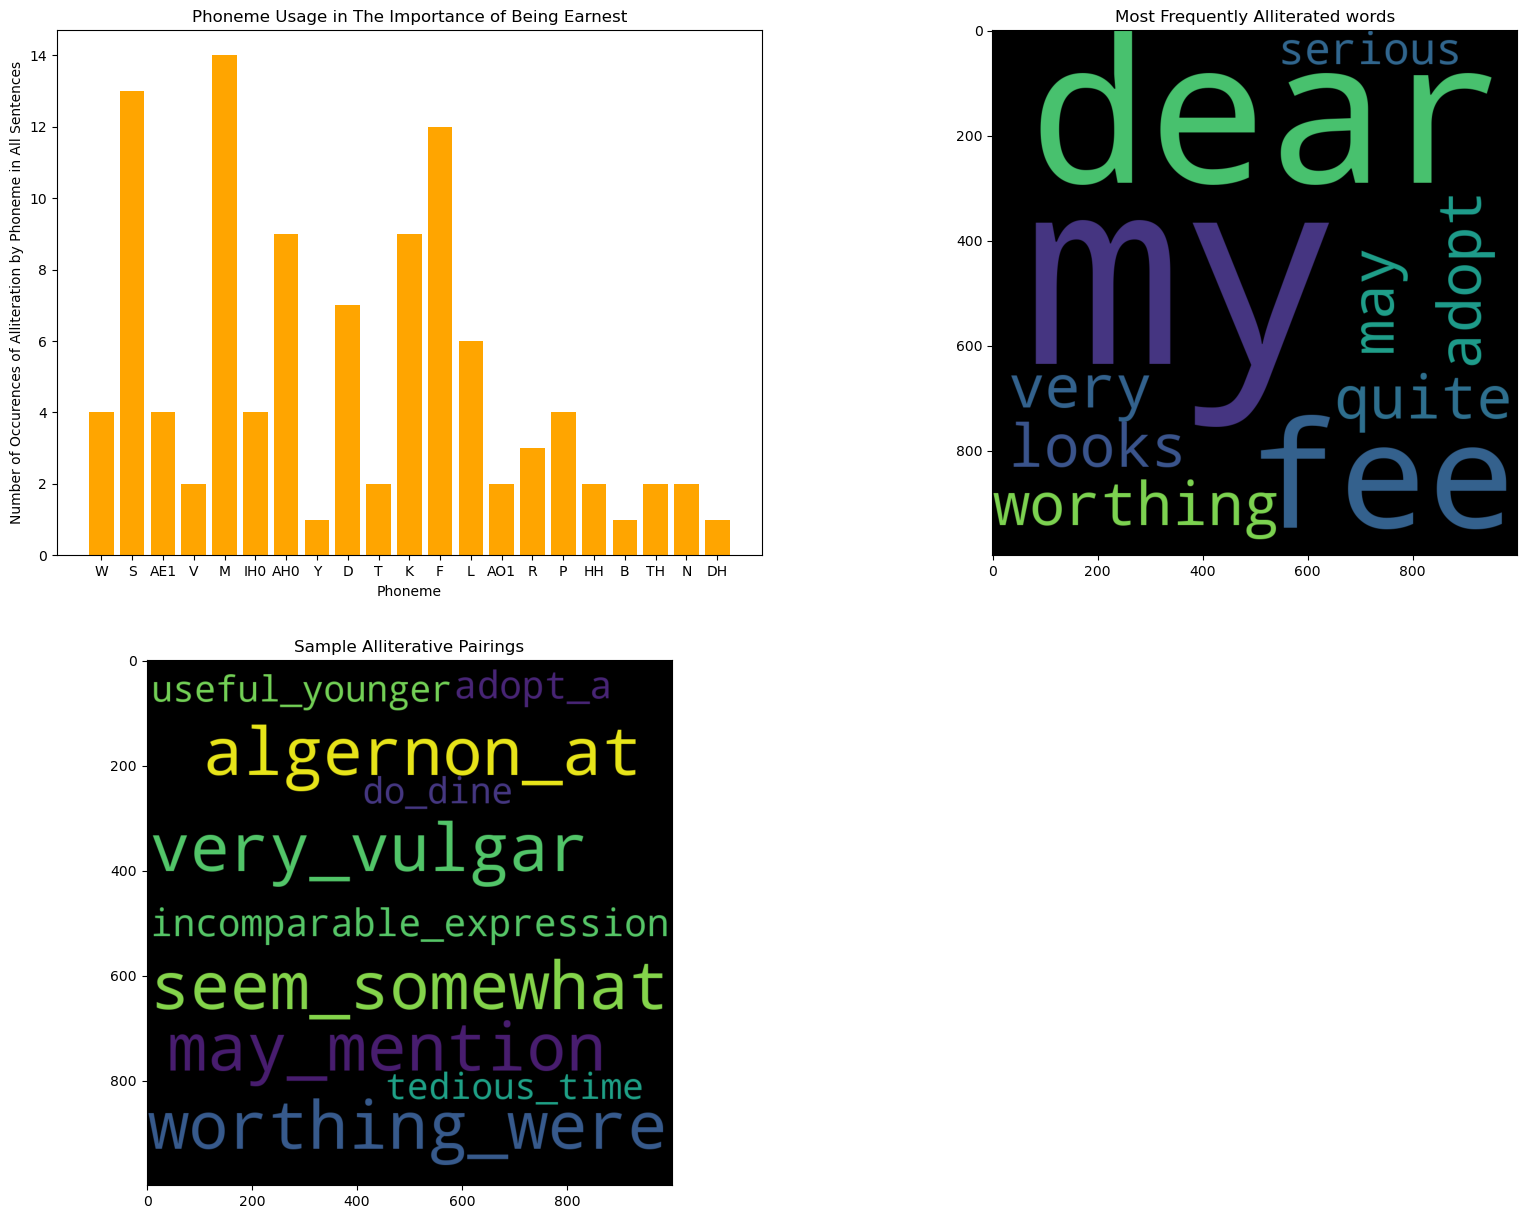

In [144]:
from plotting import get_all_alliteration_by_phoneme
get_all_alliteration_by_phoneme([ow_corpus_list[2], ow_corpus_list[5], ow_corpus_list[9]])

Since alliteration is most commonly used to draw attention to certain word choices, it is interesting to note the words that are alliterated with. Whether they were intentional or unintentional on Wilde's part, these alliterative words and pairings would have stood out to his audience. From these three texts, we can see that Wilde frequently alliterates on the s phenome, and that he used alliteration much more frequently in "The Portrait of Dorian Grey" and "A House of Pomegranates" than in "The Importance of Being Earnest". The last of these three is a comedy - perhaps he was less focused on flowery language?

The alliterative phrases also point to key events in the texts and in his life. In Dorian Grey, he uses alliterative words and phrases like "looking", "brainless_beautiful", and "very_vain", which connect back to the novel's themes of beauty and goodness. Phrases like "strange" and "pleasure_passed" also invoke the off-beat, hedonistic nature of the novel that made it so unpopular at the time.

In comparison, the alliterative phrases in "The Ducchess of Padua" invoke symbolism more similar to royalty and gods. Wilde uses alliterative phrases like "great gods", "whose hearth", and "bronze-blowing", which bring to mind riches and power. In contrast, this work also has alliterative phrases with much more negative connotations, such as "sudden secret", "false friend", "life left", and "mob mocks". Interestingly, these terms all bring to mind the trial he would undergo in four years that would destroy his reputation and leave him jailed and jaded.

"The Importance of Being Earnest" uses alliteration much less frequently, and the alliterative phrases are much more focused on dredgery and dullness. Wilde uses phrases like "do dine", "seem somewhat", and "tedious time", which point to boredom and sameness. The phrase "very_vulgar" also reappears here.

## TF-IDF
Finally, we chose to examine the TF-IDF of his writing. TF-IDF stands for "term frequency - inverse document frequency". It is a simple mathematical formula for calculating frequency of a term in a text compared to other texts in a corpus. Rather ranking the words in a document against each other, this ranks their frequency in one document against their prevalence in a set of documents. To work with TFIDF, we will create a corpus of the works we are analyzing. We will then use `compute_tf` and `compute_tf_idf` to calculate the TF-IDF. Finally, we will use `plot_tf_idf` to plot theses.

In [145]:
ow_corpus = [lord_arthur_saviles_crimes, the_happy_prince, dorian_grey, salome, house_of_pomegranates, ducchess_of_padua, the_soul_under_socialism, lady_windermeres_fan,a_woman_of_no_importance, importance_of_being_earnest, reading_gaol, ideal_husband]
tf_lasc = tf_idf.compute_tf_idf(tf_idf.compute_tf(lord_arthur_saviles_crimes), ow_corpus)
tf_thp = tf_idf.compute_tf_idf(tf_idf.compute_tf(the_happy_prince), ow_corpus)
tf_dg = tf_idf.compute_tf_idf(tf_idf.compute_tf(dorian_grey), ow_corpus)
tf_s = tf_idf.compute_tf_idf(tf_idf.compute_tf(salome), ow_corpus)
tf_hop = tf_idf.compute_tf_idf(tf_idf.compute_tf(house_of_pomegranates), ow_corpus)
tf_dop = tf_idf.compute_tf_idf(tf_idf.compute_tf(ducchess_of_padua), ow_corpus)
tf_sus = tf_idf.compute_tf_idf(tf_idf.compute_tf(the_soul_under_socialism), ow_corpus)
tf_lwf = tf_idf.compute_tf_idf(tf_idf.compute_tf(lady_windermeres_fan), ow_corpus)
tf_wni = tf_idf.compute_tf_idf(tf_idf.compute_tf(a_woman_of_no_importance), ow_corpus)
tf_ibe = tf_idf.compute_tf_idf(tf_idf.compute_tf(importance_of_being_earnest), ow_corpus)
tf_rg = tf_idf.compute_tf_idf(tf_idf.compute_tf(reading_gaol), ow_corpus)
tf_ih = tf_idf.compute_tf_idf(tf_idf.compute_tf(ideal_husband), ow_corpus)
tf_corpus = [tf_lasc, tf_thp, tf_dg, tf_s, tf_hop, tf_dop, tf_sus, tf_lwf, tf_wni, tf_ibe, tf_rg, tf_ih]

Now that we have the TFIDF values of each term in each text, we will calculate the terms with the highest tf_idf value and create a dataframe of them.

Text(0.5, 1.0, "TF-IDF values of 'The Picture of Dorian Grey'")

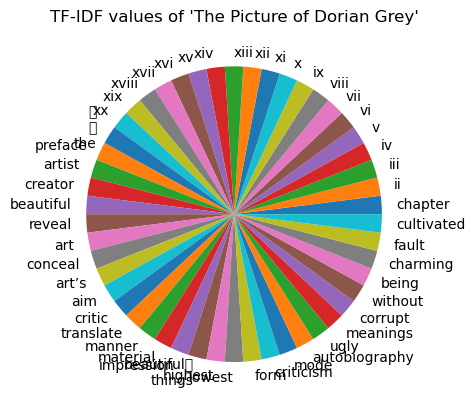

In [151]:
freq_corpus = []
for work in tf_corpus:
    most_freq = tf_idf.calc_word_freq(work, 50)
    freq_corpus.append(most_freq)

working_dict = freq_corpus[2]
labels = working_dict.keys()
freqs = working_dict.values()

fig, ax = plt.subplots()
ax.pie(freqs, labels=labels)
plt.title("TF-IDF values of 'The Picture of Dorian Grey'")


Although several of the extraneous words made it into this chart, there are several words that are unique to "The Picture of Dorian Grey". Words like "charming", "beautiful", and "art" are clearly tied to Dorian's features, there are also words such as "conceal" and "reveal" that show deception, as well as "ugly" and "corrupt" that tie back to the portrait. The TFIDF values of these words show that Wilde explored the relationship between beauty, corruption, and deception in a way that he didn't in other novels. Perhaps it was this that made "The Portrait of Dorian Gray" so reviled during his time.

## Analysis 
From analyzing Wilde's use of language, there are several clear themes that emerge. He focuses on traits such as hedonism and beauty, as well as family. These themes are tied to the major events in his life; he writes about family when his own is in turmoil; he writes about women when the women in his life have disappeared; and most importantly, he writes about life and love. Wilde was a known romantic, and we can see this bleed into the words he uses in his writing.

## Conclusions 
Although it's difficult to draw definite conclusions about Wilde's mental state from his writing, we can clearly see changes in his style and the themes he chose to focus on throughout his career.

## Reflection
After completing our analysis, it is clear that there are some things we could have improved upon. First of all, our code is a little messy occasionally hard to follow. There are also several functions that take a very long time to run. Our process was also disorganized - we went straight into trying to parse the data, without first trying to understand what we wanted from it. We also didn't write our unit tests before starting the project, which also made it difficult to test if our code was running properly. In the future, we would focus on refactoring our code to be faster, easier to follow, and more stylistically consistent.

## Difficulties 
Throughout our analysis, we ran into several issues that slowed us down. The first was with our alliteration analysis. We found that alliteration was much harder to track than we previously assumed. Our first struggle with alliteration was that alliteration isn't necessarily sequential. In fact, much of the time, alliteration isn't between two words in a row; rather, it skips words. We found that tracking alliteration between non-sequential words quickly became very troublesome,  
alliteration stuff - some phonemes dont map to anything in the dictionary, so not all alliterative sequences are accounted for.

We also some difficulties with edge cases in several of our functions. For example, despite going multiple iterations of our data cleaning process, there are still pieces of extraneous text that fall through the cracks. Another example is the sentence splitting function, which has many edge cases due to the nature of writing. 

## Limitations 
As discussed before, we made several compromises that resulted in our analysis being less thorough than it would have been otherwise. Our alliteration analysis is limited to two sequential words in a row and can only detect phonemes in the dictionary we give it. Our unit test functionality for alliteration is also limited because some alliterative sequences have phonemes that don't map to those in the dictionary, meaning that get_phenomes returns `None` for these cases. This makes it harder for us to test robustly, and also highlights a portion of our code that could be improved upon.

## Potential Future Work 
There are several things that we could work on in the future in addition to the issues mentioned above. First, we could make our data cleaning more robust, and focus on keeping it in a consistent format. We can also improve our TFIDF algorithm, as it caught several extraneous words. There are also several literary devices we were interested in exploring, but ran out of time for, including similes and phallic and yonic symbolism. Another application for our work is comparing Wilde's use of language to his contemporaries to focus less on the timeline of his life, and more on what made him unique.